# **Logistic Regression**

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

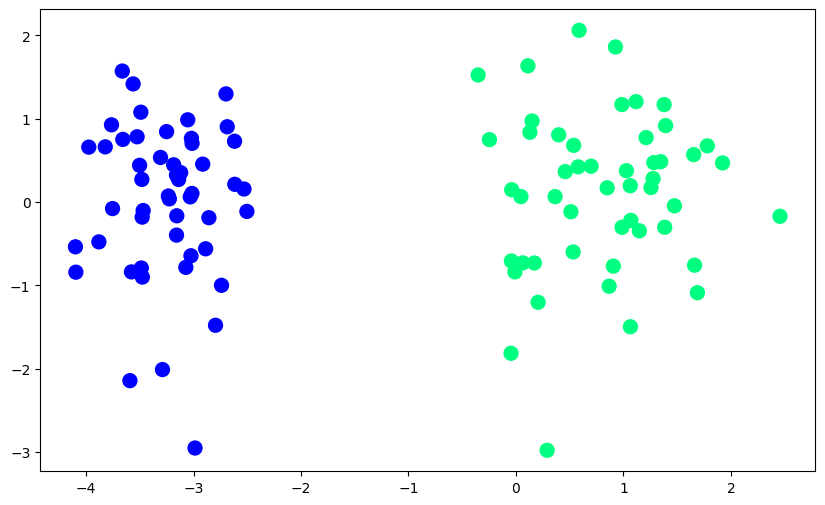

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100);

## **1. Perceptron Trick**

In [3]:
# Step Funtion
def step(z):
    return 1 if z>0 else 0

In [4]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr=0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j] - y_hat)*X[j]
    
    return weights[0],weights[1:]


In [5]:
intercept_,coef_ = perceptron(X,y)

In [6]:
print("Intercept :",intercept_)
print("Coefficients :",coef_)

Intercept : 1.2000000000000002
Coefficients : [1.0580085  0.40381514]


In [7]:
m = -(coef_[0]/coef_[1])

b = -(intercept_/coef_[1])

In [8]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

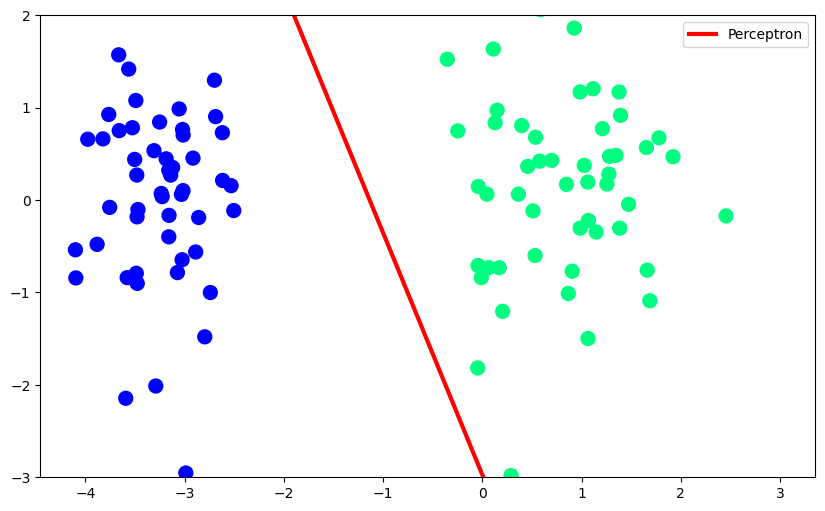

In [9]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label="Perceptron")
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.legend()
plt.ylim(-3,2)

## **2. Using Sklearn**

In [10]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None, solver='sag')
lor.fit(X, y)

c:\Users\nasrullah\.conda\envs\python_ml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [11]:
print("Intercept :",intercept_)
print("Coefficients :",coef_)

Intercept : 1.2000000000000002
Coefficients : [1.0580085  0.40381514]


In [12]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [13]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

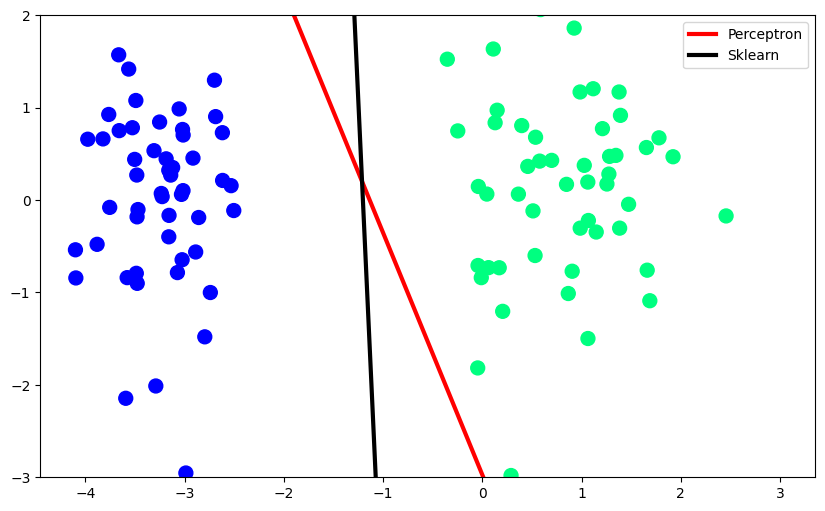

In [14]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label="Perceptron")
plt.plot(x_input1,y_input1,color='black',linewidth=3,label="Sklearn")
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.legend()
plt.ylim(-3,2)

## **3. Using Sigmoid Function**

In [15]:
# Sigmoid Function
def sig(z):
    return 1/(1 + np.exp(-z))

In [16]:
def sigmoid(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sig(np.dot(weights,X[j]))
        weights = weights + lr*(y[j] - y_hat) * X[j]
    
    return weights[0] , weights[1:]

In [17]:
intercept_ , coef_ = sigmoid(X,y)

In [18]:
print("Intercept :",intercept_)
print("Coefficients :",coef_)

Intercept : 2.7755819806469297
Coefficients : [2.8498309 0.1497932]


In [19]:
m = - (coef_[0] / coef_[1])
b = - (intercept_ / coef_[1])

In [20]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input2 + b

(-3.0, 2.0)

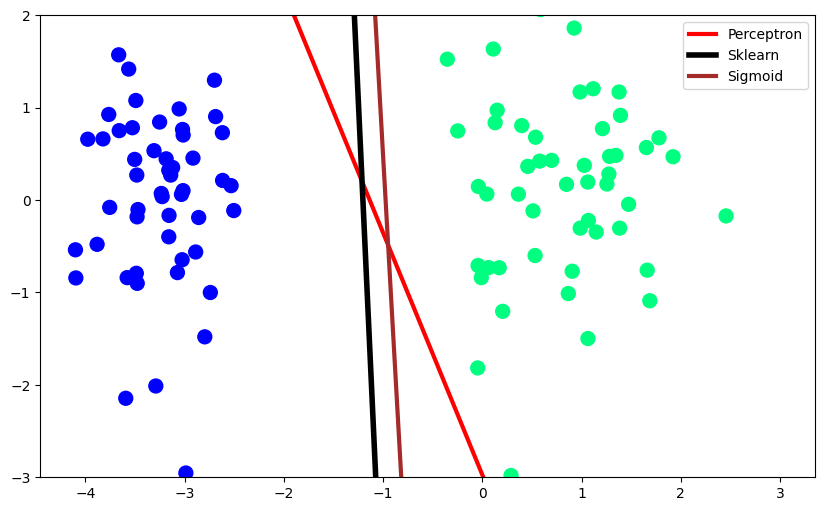

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label="Perceptron")
plt.plot(x_input1,y_input1,color='black',linewidth=4,label="Sklearn")
plt.plot(x_input2,y_input2,color='brown',linewidth=3,label="Sigmoid")
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.legend()
plt.ylim(-3,2)

## **4. Using Gradient Descent**

In [22]:
# Sigmoid Function
def sigd(z):
    return 1 / (1 + np.exp(-z))

In [23]:
def gd(X,y):
    lr = 0.5
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])

    for i in range(5000):

        y_hat = sig(np.dot(X,weights))
        weights = weights + lr * (np.dot((y - y_hat),X)/X.shape[0])

    return weights[1:],weights[0]

In [24]:
coef_, intercept_ = gd(X, y)

print("Coefficients:", coef_)
print("Intercept (Bias):", intercept_)

Coefficients: [4.83926872 0.21182255]
Intercept (Bias): 5.833388649053249


In [25]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [26]:
x_input3 = np.linspace(-3,3,100)
y_input3 = m*x_input3 + b

(-3.0, 2.0)

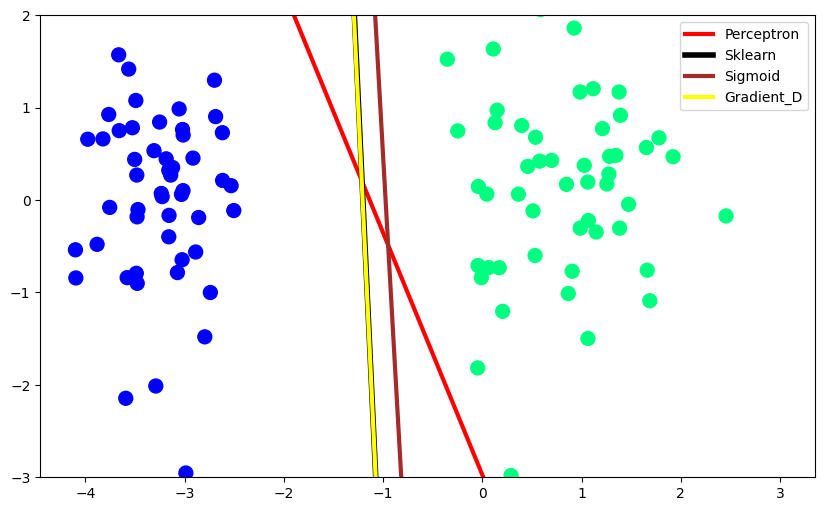

In [27]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label="Perceptron")
plt.plot(x_input1,y_input1,color='black',linewidth=4,label="Sklearn")
plt.plot(x_input2,y_input2,color='brown',linewidth=3,label="Sigmoid")
plt.plot(x_input3,y_input3,color='Yellow',linewidth=3,label="Gradient_D")
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.legend()
plt.ylim(-3,2)